## 1. Project Overview

### 1.1 Business Objective

Evaluate whether the World Bank's education data can provide sufficient and reliable insights to guide **Academy's international expansion strategy** for online education services.

---

### 1.2 Specific Goals

**Analytical Approach:**  
Conduct an exploratory analysis of the World Bank EdStats datasets to assess their relevance, completeness, and potential to inform strategic expansion decisions.

**Key Deliverables:**
- Identify countries with high potential demand for online education services
- Analyze trends in educational indicators to forecast future opportunities
- Provide data-driven recommendations for market prioritization

**Target Market:**  
High school and university-level learners in international markets

**Expected Outcome:**  
Determine whether the available data can generate actionable insights for Academy's country prioritization and expansion roadmap.

---

### 1.3 Dataset Description

The analysis uses the **World Bank EdStats database**, a comprehensive collection of global education indicators. The database consists of five related datasets, all linked through a common **Indicator Code/Series Code**:

#### Core Datasets

- **EdStatsData**  
The primary quantitative dataset containing indicator values by country and year. This serves as the foundation for all analyses.

- **EdStatsSeries**  
A complete catalog of available indicators, including names, definitions, and thematic categories. Essential for understanding what each metric represents.

- **EdStatsCountry**  
Country-level metadata including names, ISO codes, regional classifications, and income groups. Defines the geographic and economic scope of the analysis.

- **EdStatsCountry-Series**  
Links countries to specific indicators with additional metadata such as data sources, units of measurement, and coverage notes. Provides context for data interpretation.

- **EdStatsFootNote**  
Explanatory notes and caveats for specific data points. Adds interpretive context and highlights data quality considerations.

---

In [1]:
# Standard library imports
import math
from pathlib import Path

# Third-party imports - Data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats

# Third-party imports - Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Third-party imports - Jupyter/IPython
from IPython.display import display, HTML, Markdown

# Local application imports
from project2.data.Filesloader import Reader
from project2.data.Saver import Saver
from project2.utils.Cleaner import Cleaner
from project2.utils.Config import Config
from project2.utils.DataInspector import BasicInfo, VisualInspector

# Jupyter magic commands
%load_ext autoreload
%autoreload 2

In [2]:
# Initialize data pipeline components
data_loader = Reader()
data_inspector = BasicInfo(data_loader)
display_config = Config()
file_saver = Saver()
conf = Config()

In [3]:
# Load raw data files
data_pattern = '../data/raw/*.csv'
conf.pdconfig(nrows=None, cols_width=None, precision=None)
file_names, data_dict = data_loader.load_raw_files_csv(data_pattern)

Pandas config display options set.

,Filesnames
0,EdStatsCountry
1,EdStatsCountry-Series
2,EdStatsData
3,EdStatsFootNote
4,EdStatsSeries


## The head of each data sets 

In [4]:
conf.pdconfig(nrows=5, cols_width=None)
data_inspector.show_head()

Pandas config display options set.

### ----------- 0 - EdStatsCountry --------------

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accounts methodology.,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from administrative registers.,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


### ----------- 1 - EdStatsCountry-Series --------------

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


### ----------- 2 - EdStatsData --------------

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, both sexes (%)",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, female (%)",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, gender parity index (GPI)",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, male (%)",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sexes (%)",SE.PRM.TENR,54.822,54.894,56.209,57.267,57.991,59.366,61.0,61.923,62.693,64.383,65.618,66.085,66.608,67.29,68.51,69.033,69.945,71.042,71.694,71.699,71.996,72.603,70.033,70.465,72.646,71.812,73.904,74.425,75.111,76.254,77.246,78.801,80.051,80.805,81.607,82.489,82.686,83.28,84.012,84.196,85.212,85.245,86.102,85.512,85.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### ----------- 3 - EdStatsFootNote --------------

,CountryCode,SeriesCode,Year,DESCRIPTION,Unnamed: 4
0,ABW,SE.PRE.ENRL.FE,YR2001,Country estimation.,NaN
1,ABW,SE.TER.TCHR.FE,YR2005,Country estimation.,NaN
2,ABW,SE.PRE.TCHR.FE,YR2000,Country estimation.,NaN
3,ABW,SE.SEC.ENRL.GC,YR2004,Country estimation.,NaN
4,ABW,SE.PRE.TCHR,YR2006,Country estimation.,NaN


### ----------- 4 - EdStatsSeries --------------

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dataset Structure

Each dataset serves a specific purpose in the EdStats database:

- **EdStatsCountry:** Country-level metadata (regions, income groups, classifications)
- **EdStatsCountry-Series:** Country-indicator mappings with data sources and units
- **EdStatsData:** Time-series values for each country-indicator-year combination
- **EdStatsFootNote:** Explanatory notes and caveats for specific data points
- **EdStatsSeries:** Complete indicator catalog with definitions and categories

## Basic Info 

In [5]:
data_inspector.info()

### --- Info-------- 0 - EdStatsCountry --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

<IPython.core.display.Markdown object>

,shape,columns,rows,missing (%),numeric_features,categorical_features,Duplicants
0,"(241, 32)",32,241,30.524,3,29,0


### --- Info-------- 1 - EdStatsCountry-Series --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


<IPython.core.display.Markdown object>

,shape,columns,rows,missing (%),numeric_features,categorical_features,Duplicants
0,"(613, 4)",4,613,25.0,0,4,0


### --- Info-------- 2 - EdStatsData --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

<IPython.core.display.Markdown object>

,shape,columns,rows,missing (%),numeric_features,categorical_features,Duplicants
0,"(886930, 70)",70,886930,86.1,64,6,0


### --- Info-------- 3 - EdStatsFootNote --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


<IPython.core.display.Markdown object>

,shape,columns,rows,missing (%),numeric_features,categorical_features,Duplicants
0,"(643638, 5)",5,643638,20.0,0,5,0


### --- Info-------- 4 - EdStatsSeries --------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

<IPython.core.display.Markdown object>

,shape,columns,rows,missing (%),numeric_features,categorical_features,Duplicants
0,"(3665, 21)",21,3665,71.725,0,21,0


## Dataset Inspection

### EdStatsCountry
Country-level metadata containing:
- **Identifiers:** Country Code, Short Name, Long Name
- **Classifications:** Region, Income Group, Currency Unit
- **Statistical metadata:** National accounts reference years, PPP survey years, and reporting standards

---

### EdStatsCountry-Series
Links countries to specific education indicators:
- **Keys:** CountryCode, SeriesCode
- **Content:** Descriptions of country-indicator relationships
- **Note:** Contains an empty column (Unnamed: 3) to be removed

---

### EdStatsData
**Core dataset** containing time-series education indicators (≈887K rows):
- **Identifiers:** Country Name/Code, Indicator Name/Code
- **Time coverage:** Historical data (1970–2017) and projections (2020–2100)
- **Structure:** Each row represents one country-indicator-year observation
- **Note:** Contains an empty column (Unnamed: 69) to be removed

---

### EdStatsFootNote
Contextual notes for specific data points:
- **Keys:** CountryCode, SeriesCode, Year
- **Content:** Explanatory text and caveats for individual observations
- **Note:** Contains an empty column (Unnamed: 4) to be removed

---

### EdStatsSeries
Indicator definitions and methodology (complete catalog):
- **Core fields:** Series Code, Topic, Indicator Name
- **Definitions:** Short and long descriptions with data sources
- **Methodology:** Periodicity, base periods, aggregation methods
- **Note:** Several empty fields (Unit of measure, License Type, Other web links) can be dropped

## Statiscal Description of Numerical Features 

In [6]:
data_inspector.describe()

### --- Description-------- 0 - EdStatsCountry --------------

,count,mean,std,min,25%,50%,75%,max
National accounts reference year,22.0,2001.955,5.843,1987.0,1997.00,2005.0,2005.0,2012.0
Latest industrial data,22.0,2008.773,1.998,2001.0,2008.25,2009.0,2010.0,2010.0
Latest trade data,22.0,2011.955,0.213,2011.0,2012.00,2012.0,2012.0,2012.0


### No numerical features here - EdStatsCountry-Series

### No numerical features here - EdStatsData

### No numerical features here - EdStatsFootNote

### No numerical features here - EdStatsSeries

### Data Quality Assessment

**EdStatsCountry - Numerical Fields (n=22 countries):**

| Field | Mean Year | Range | Observation |
|-------|-----------|-------|-------------|
| National accounts reference year | 2002 | 1987–2012 | Wide variation in reporting standards |
| Latest industrial data | 2009 | 2001–2010 | Most recent updates circa 2009–2010 |
| Latest trade data | 2012 | 2011–2012 | Consistent, recent reporting |

**Key Finding:**  
Data completeness and recency vary significantly across metadata fields. The 2005–2012 window represents the optimal period for cross-country analysis, balancing data availability with recency.

**Other Datasets:**  
EdStatsCountry-Series, EdStatsData, EdStatsFootNote, and EdStatsSeries contain no numerical fields requiring summary statistics.

---

## Missingness

In [7]:
data_inspector.missingness(disp=True)

### --- Missingness -------- 0 - EdStatsCountry --------------

,%Missing
Country Code,0.00
Short Name,0.00
Table Name,0.00
Long Name,0.00
2-alpha code,1.24
Currency Unit,10.79
Special Notes,39.83
Region,11.20
Income Group,11.20
WB-2 code,0.41


### --- Missingness -------- 1 - EdStatsCountry-Series --------------

,%Missing
CountryCode,0.0
SeriesCode,0.0
DESCRIPTION,0.0
Unnamed: 3,100.0


### --- Missingness -------- 2 - EdStatsData --------------

,%Missing
Country Name,0.00
Country Code,0.00
Indicator Name,0.00
Indicator Code,0.00
1970,91.85
1971,95.99
1972,95.98
1973,95.99
1974,95.97
1975,90.16


### --- Missingness -------- 3 - EdStatsFootNote --------------

,%Missing
CountryCode,0.0
SeriesCode,0.0
Year,0.0
DESCRIPTION,0.0
Unnamed: 4,100.0


### --- Missingness -------- 4 - EdStatsSeries --------------

,%Missing
Series Code,0.00
Topic,0.00
Indicator Name,0.00
Short definition,41.17
Long definition,0.00
Unit of measure,100.00
Periodicity,97.30
Base Period,91.43
Other notes,84.94
Aggregation method,98.72


### Missingness — 1: EdStatsCountry

### Missingness — 2: EdStatsCountry-Series

### Missingness — 3: EdStatsData

### Missingness — 4: EdStatsFootNote

### Missingness — 5: EdStatsSeries

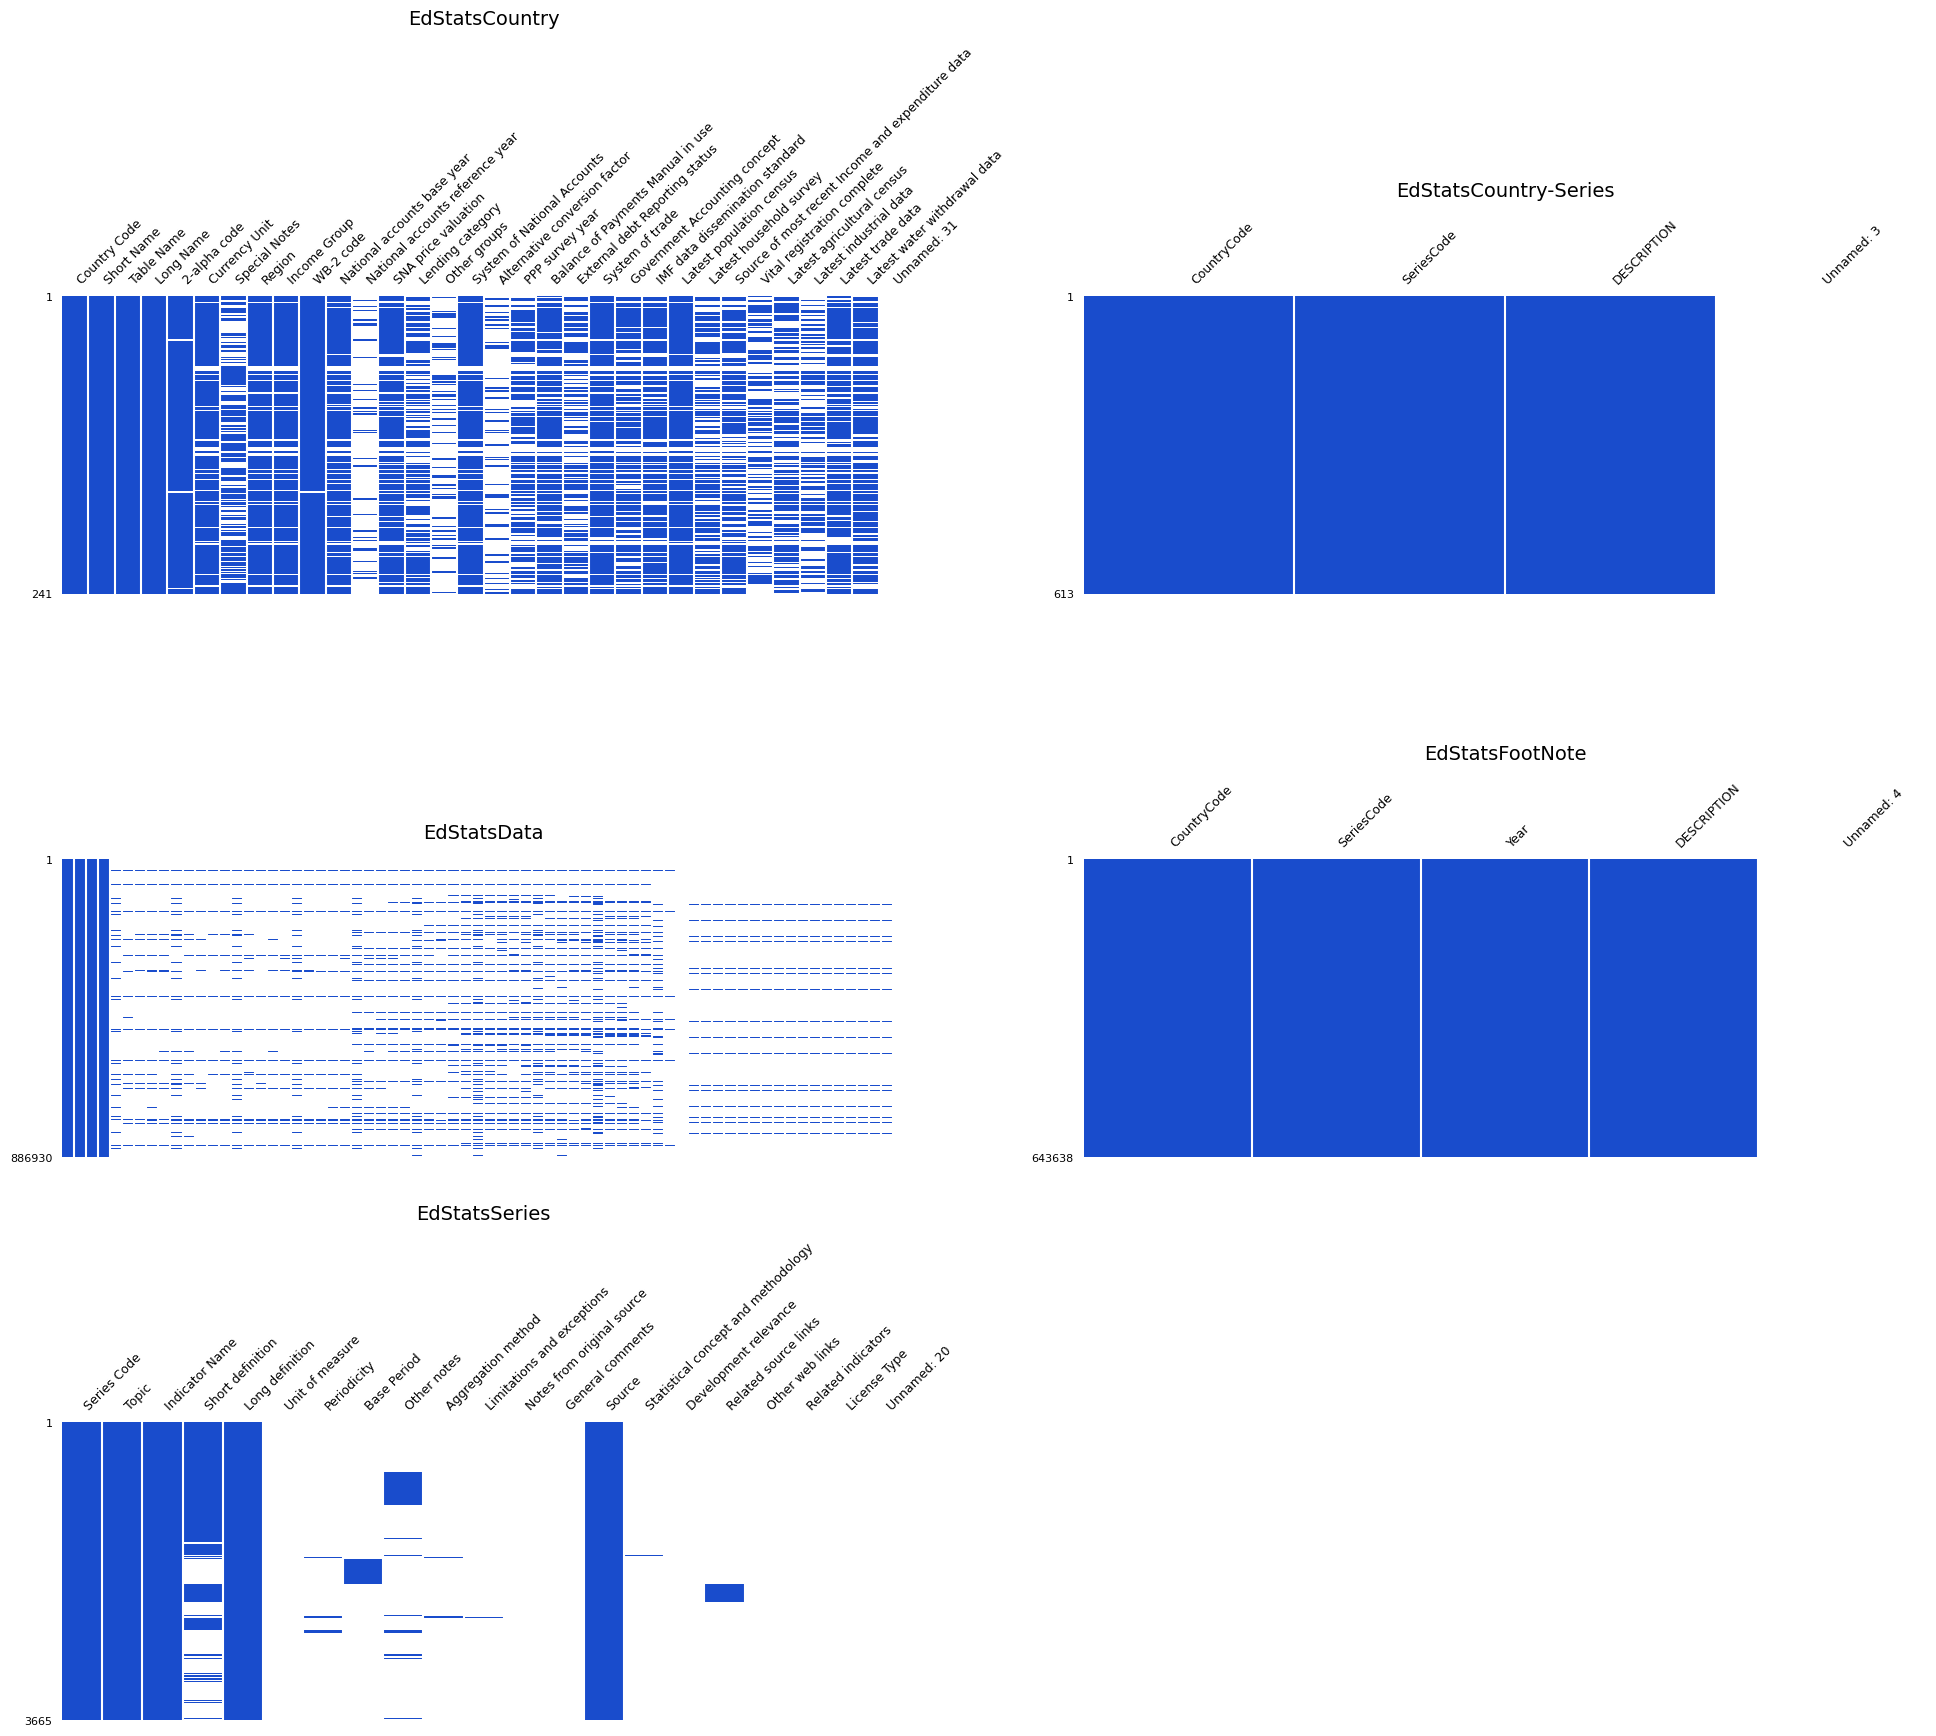

In [8]:
data_inspector.visualize_missingness()

In [9]:
# Drop high-missingness columns
year_columns = np.arange(1970, 2101).astype(str)
data_inspector.dropabove(skip_cols=year_columns, missing_threshold=70)

### --- Missingness -------- 0 - EdStatsCountry --------------

### --- Missingness -------- 1 - EdStatsCountry-Series --------------

### --- Missingness -------- 2 - EdStatsData --------------

### --- Missingness -------- 3 - EdStatsFootNote --------------

### --- Missingness -------- 4 - EdStatsSeries --------------

Dropped 4 columns from **EdStatsCountry** (>70% missing): ['National accounts reference year', 'Other groups', 'Alternative conversion factor', 'Unnamed: 31']

✓ File saved: /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsCountry.csv


Dropped 1 columns from **EdStatsCountry-Series** (>70% missing): ['Unnamed: 3']

✓ File saved: /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsCountry-Series.csv


Dropped 1 columns from **EdStatsData** (>70% missing): ['Unnamed: 69']

✓ File saved: /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsData.csv


Dropped 1 columns from **EdStatsFootNote** (>70% missing): ['Unnamed: 4']

✓ File saved: /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsFootNote.csv


Dropped 15 columns from **EdStatsSeries** (>70% missing): ['Unit of measure', 'Periodicity', 'Base Period', 'Other notes', 'Aggregation method', 'Limitations and exceptions', 'Notes from original source', 'General comments', 'Statistical concept and methodology', 'Development relevance', 'Related source links', 'Other web links', 'Related indicators', 'License Type', 'Unnamed: 20']

✓ File saved: /Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/data/interim/EdStatsSeries.csv


## Missing Data Assessment

### Visual Interpretation
**Heatmap Legend:**
- **Blue cells:** Data available
- **White cells:** Missing data

### Dataset-by-Dataset Analysis

**EdStatsCountry**
- **Identifiers:** Complete (Country Code, Short Name, Long Name)
- **Moderate gaps:** Region, Income Group, trade system classifications
- **Severe gaps:** Lending Category, PPP Survey Year, National Accounts Reference Year
- **Action:** Drop entirely empty columns including Unnamed: 31

**EdStatsCountry-Series**
- **Status:** Nearly complete coverage across all records
- **Complete fields:** CountryCode, SeriesCode, Description
- **Action:** Drop Unnamed: 3 (entirely empty)

**EdStatsData**
- **Identifiers:** Complete (Country Name/Code, Indicator Name/Code)
- **Critical issue:** Early years (1970–1995) show very high missingness (>70%)
- **Optimal period:** 1995–2015 shows strongest data density
- **Decision:** Retain temporarily for filtering analysis; likely exclude pre-1995 data from final dataset

**EdStatsFootNote**
- **Status:** Excellent completeness
- **Complete fields:** CountryCode, SeriesCode, Year, Description
- **Action:** Drop Unnamed: 4 (entirely empty)

**EdStatsSeries**
- **Complete:** Series Code, Topic, Indicator Name, Source (core metadata well-documented)
- **Severe gaps:** Methodological fields (Unit of Measure, Periodicity, Aggregation methods, Notes)
- **Action:** Drop entirely empty columns including Unnamed: 20

### Data Quality Summary

**Strengths:**
- Core identifiers and linkage keys complete across all datasets
- Strong data coverage in the 1995–2015 window

**Limitations:**
- Historical data (pre-1995) severely incomplete
- Methodological metadata limited but sufficient for basic analysis

**Data Cleaning Strategy:**
Drop columns with >70% missing values to maintain analytical reliability. Beyond this threshold, imputation would introduce artificial or unreliable information.

---

## Categorical Variables Overview

In [10]:
data_inspector.modality()

'---------EdStatsCountry---------------'

,Nunique Features
Country Code,241
Short Name,241
Table Name,241
Long Name,241
2-alpha code,238
Currency Unit,152
Special Notes,131
Region,7
Income Group,5
WB-2 code,240


'---------EdStatsCountry-Series---------------'

,Nunique Features
CountryCode,211
SeriesCode,21
DESCRIPTION,97


'---------EdStatsData---------------'

,Nunique Features
Country Name,242
Country Code,242
Indicator Name,3665
Indicator Code,3665
2017,4


'---------EdStatsFootNote---------------'

,Nunique Features
CountryCode,239
SeriesCode,1558
Year,56
DESCRIPTION,9102


'---------EdStatsSeries---------------'

,Nunique Features
Series Code,3665
Topic,37
Indicator Name,3665
Short definition,1169
Long definition,2060
Source,31


## Variable Classification by Dataset

### EdStatsCountry
**Identifiers (11 fields):**  
Country Code, Short/Long/Table Name, Currency Unit, and survey reference fields (Household Survey, Base Year)

**Categorical (14 fields):**  
Region, Income Group, Lending Category, System of Trade, Population Census year, Agricultural Census year

---

### EdStatsCountry-Series
**Identifiers:** CountryCode, Description  
**Categorical:** SeriesCode (links indicators to countries)

---

### EdStatsData
**Identifiers:** Country Name/Code, Indicator Name/Code  
**Categorical:** None (primarily numeric time-series values)

---

### EdStatsFootNote
**Identifiers:** CountryCode, SeriesCode, Description  
**Categorical:** Year (temporal reference for annotations)

---

### EdStatsSeries
**Identifiers:** Series Code, Indicator Name, Short Definition, Long Definition  
**Categorical:** Topic, Source (thematic and origin classifications)

---

## Categorical Variable Distribution - Cardinality 

In [11]:
conf.pdconfig(nrows=10,cols_width=10)
data_inspector.modalclassification()

Pandas config display options set.

EdStatsCountry      Country Code Short Name Table Name  Long Name 2-alpha code Currency Unit Special Notes     Region Income Group WB-2 code National accounts base year SNA price valuation Lending category System of National Accounts PPP survey year Balance of Payments Manual in use External debt Reporting status System of trade Government Accounting concept IMF data dissemination standard Latest population census Latest household survey Source of most recent Income and expenditure data Vital registration complete Latest agricultural census  Latest industrial data  Latest trade data Latest water withdrawal data
0          ABW        Aruba      Aruba      Aruba         AW    Aruban...     SNA da...     Latin ...  High i...          AW       2000                   Value ...                 NaN        Countr...                         NaN       IMF Ba...                               NaN                      Specia...             NaN                           NaN                          

## Cardinality Analysis

This analysis examines the number of unique values in each categorical variable to assess their analytical utility.

**Purpose:**
- **Low cardinality (2–20 unique values):** Suitable for grouping, segmentation, and comparative analysis (e.g., Region, Income Group)
- **High cardinality (>100 unique values):** Typically identifiers or metadata with limited analytical value (e.g., Country Name, Indicator Code)

**Application:**
Understanding cardinality guides feature selection for analysis and helps identify which variables are most useful for aggregation, visualization, and pattern discovery.

---

## Frequency Distribution Analysis

Pandas config display options set.


### Dataset: EdStatsCountry


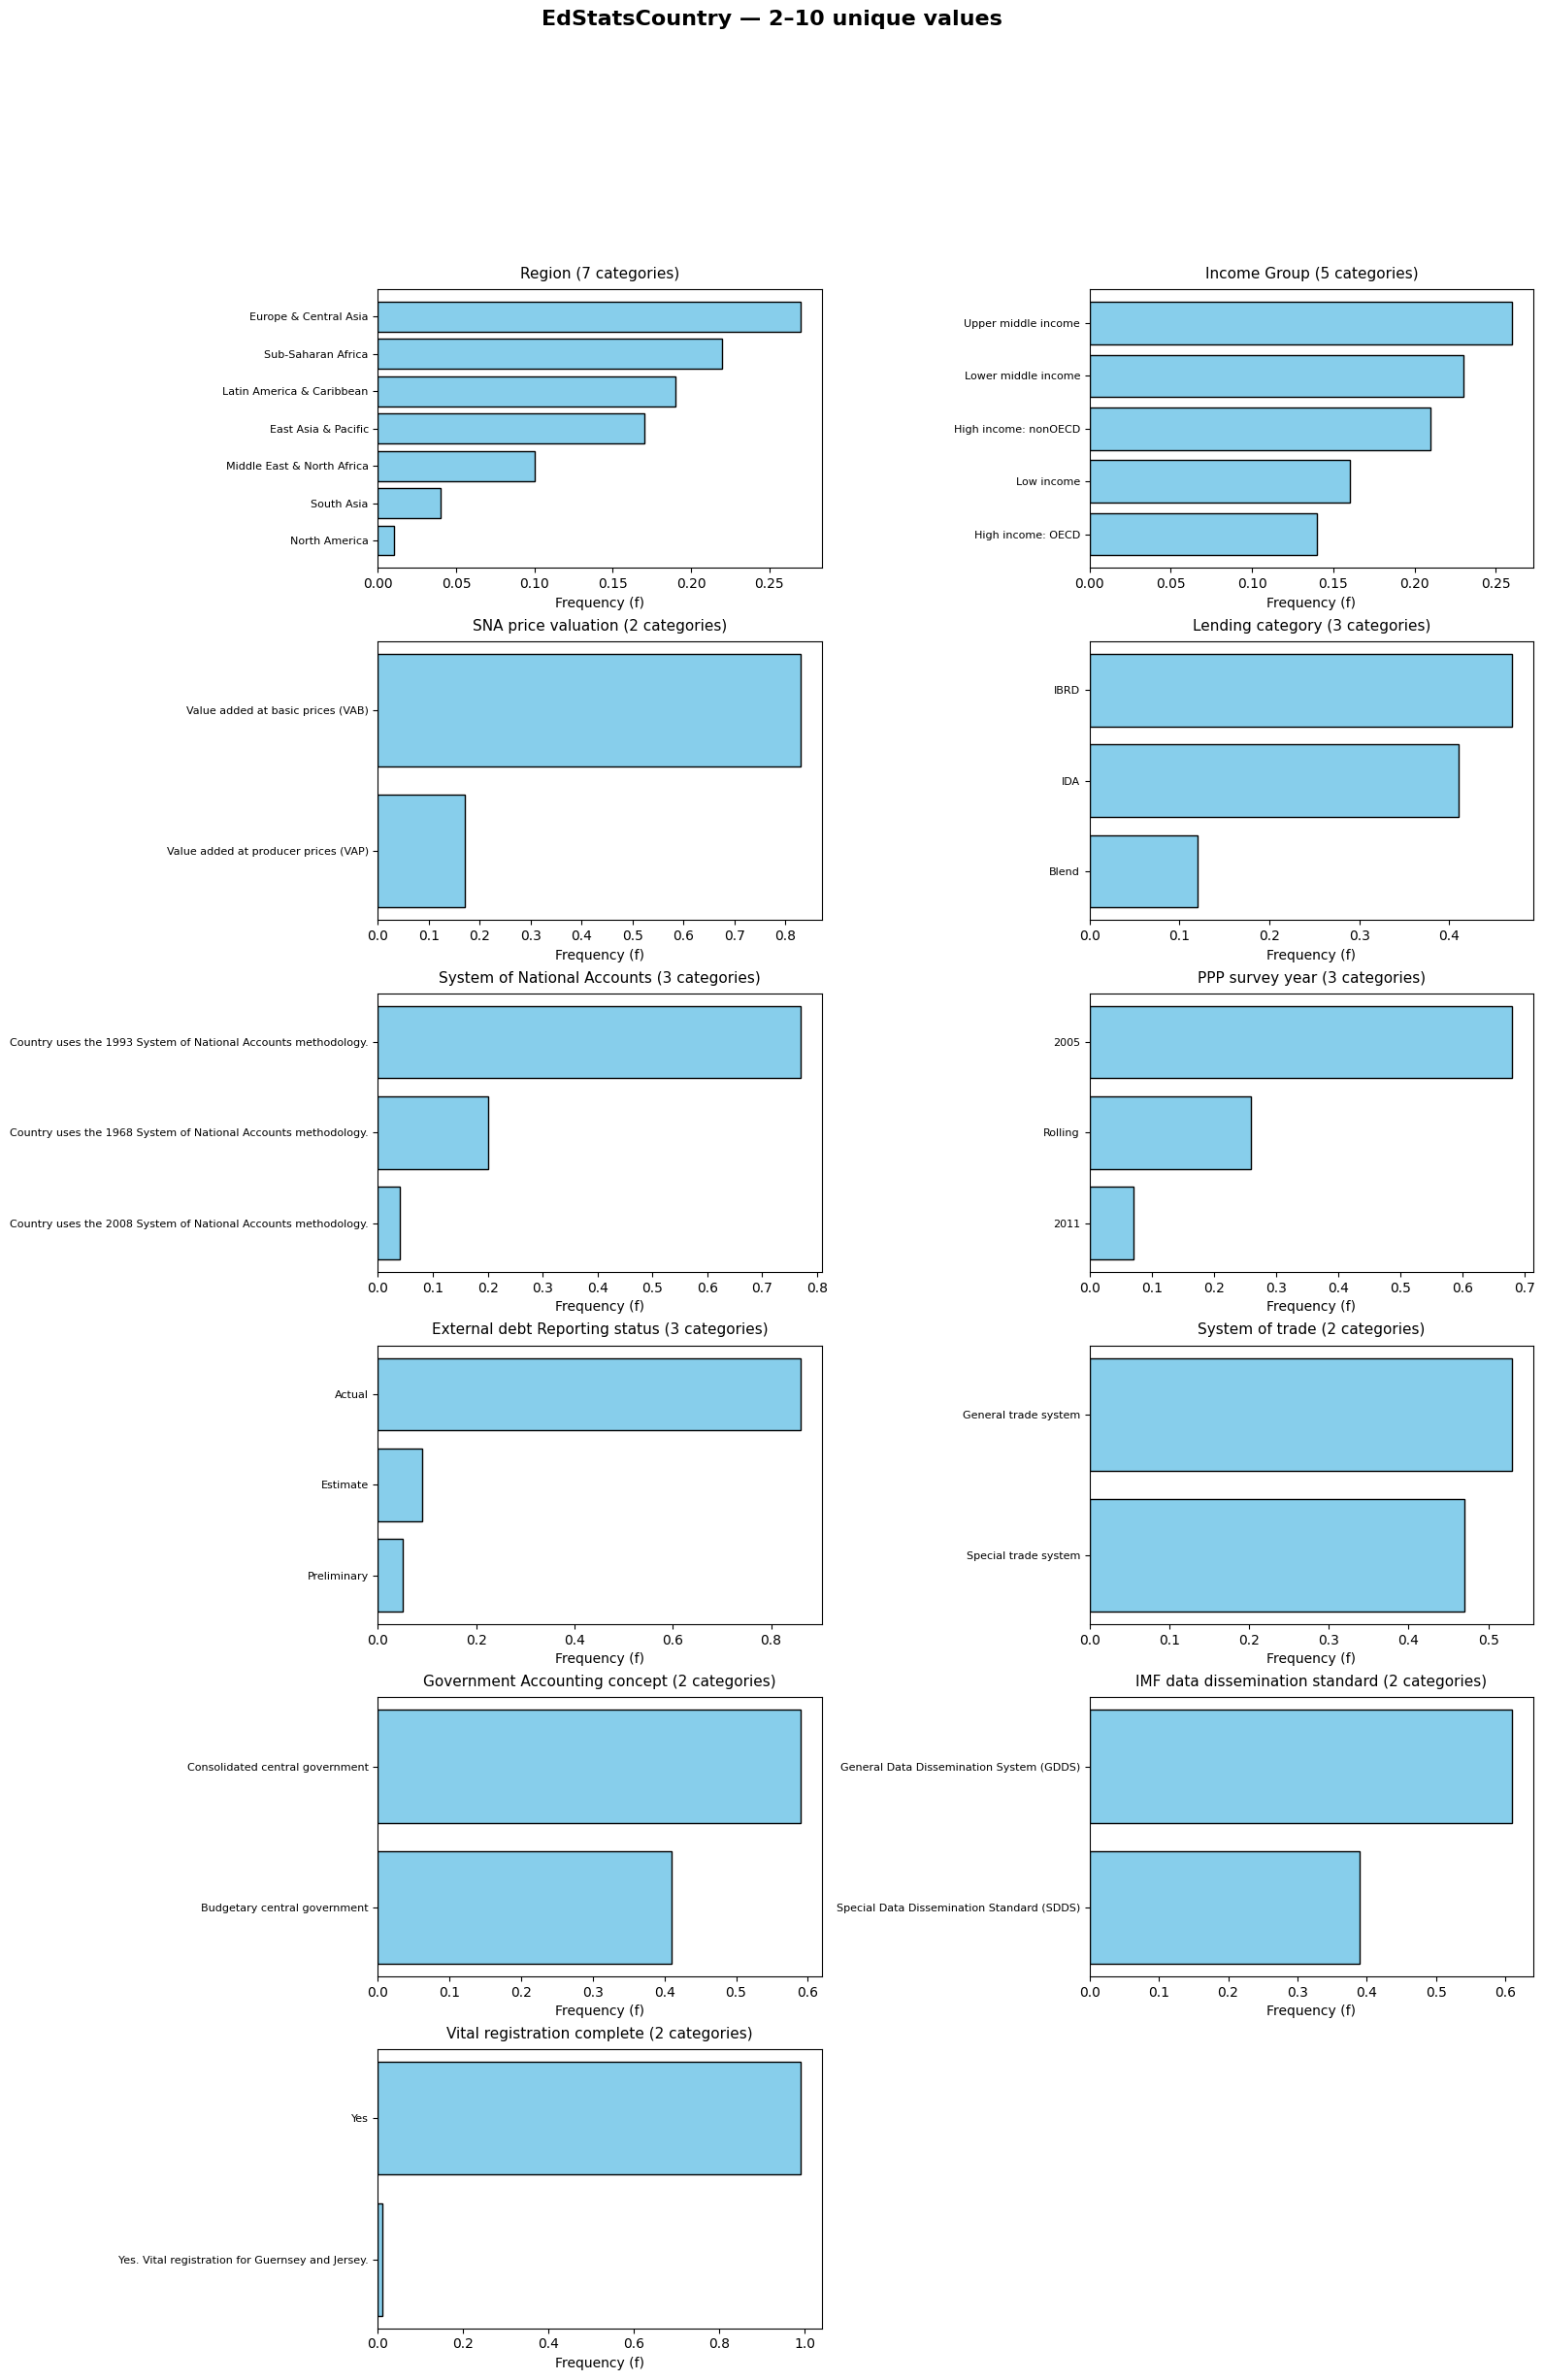

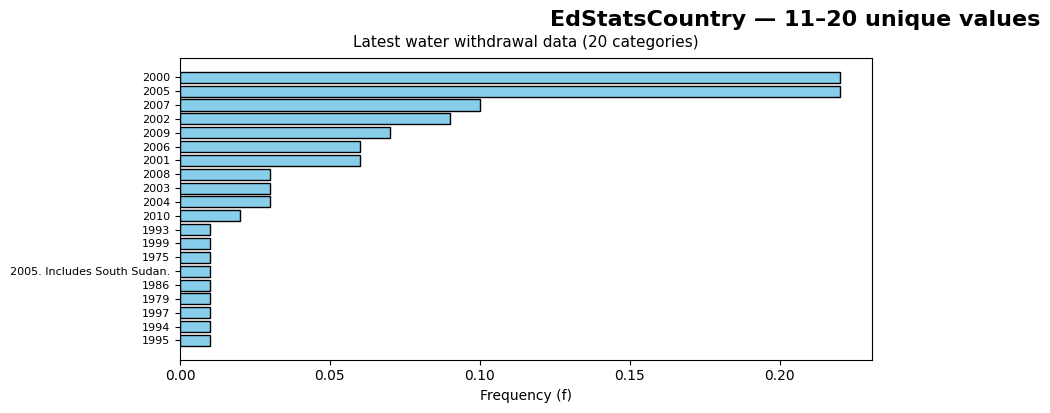

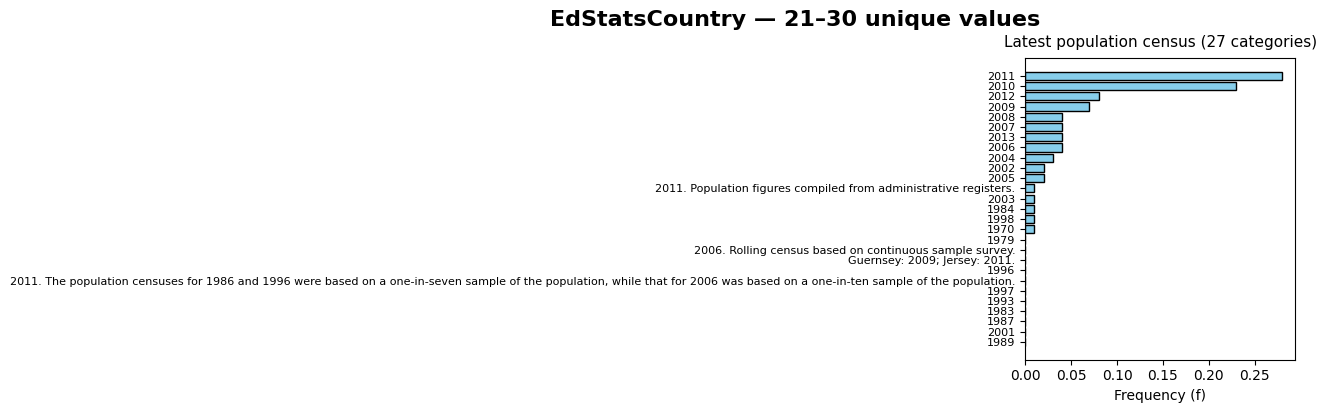

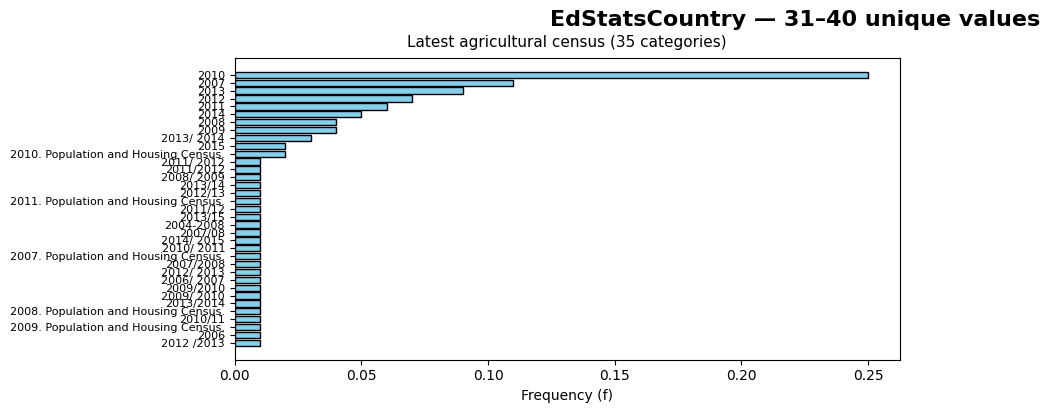


### Dataset: EdStatsCountry-Series


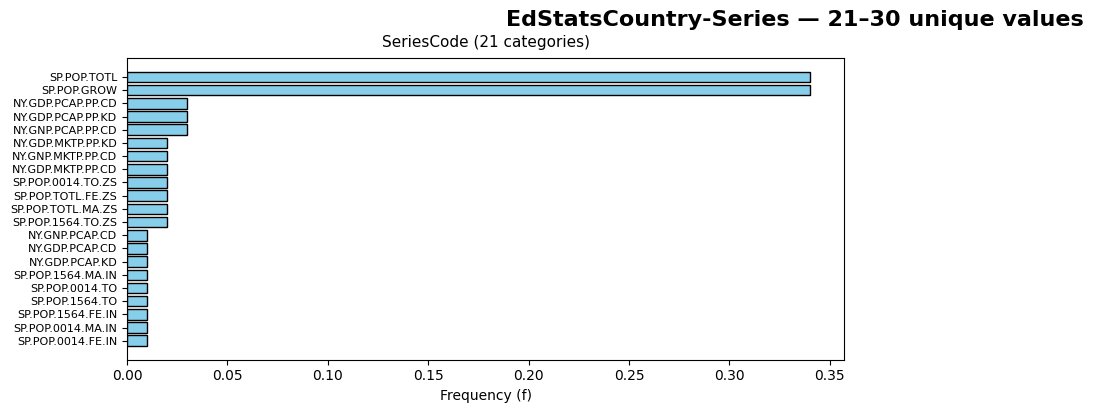


### Dataset: EdStatsData


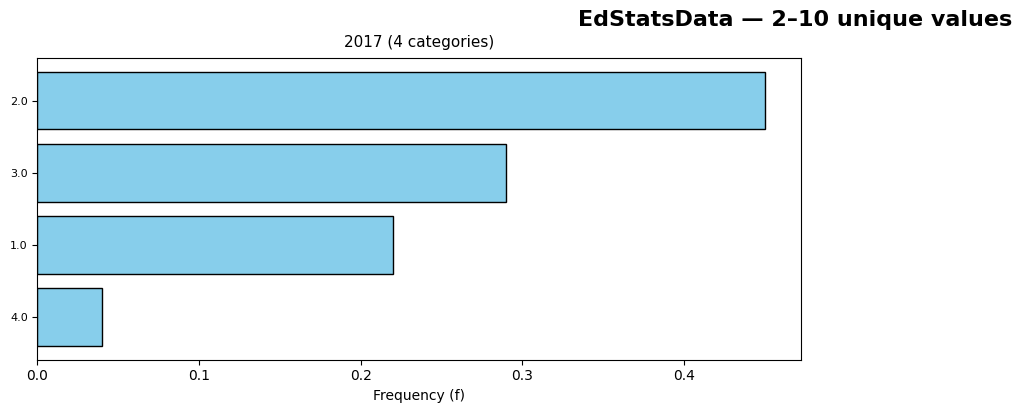


### Dataset: EdStatsFootNote

### Dataset: EdStatsSeries


/Users/hopedonglo/Documents/Projects/OpenClassRooms/OpenClassroom_Projects/project_2/src/project2/utils/DataInspector.py:351: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


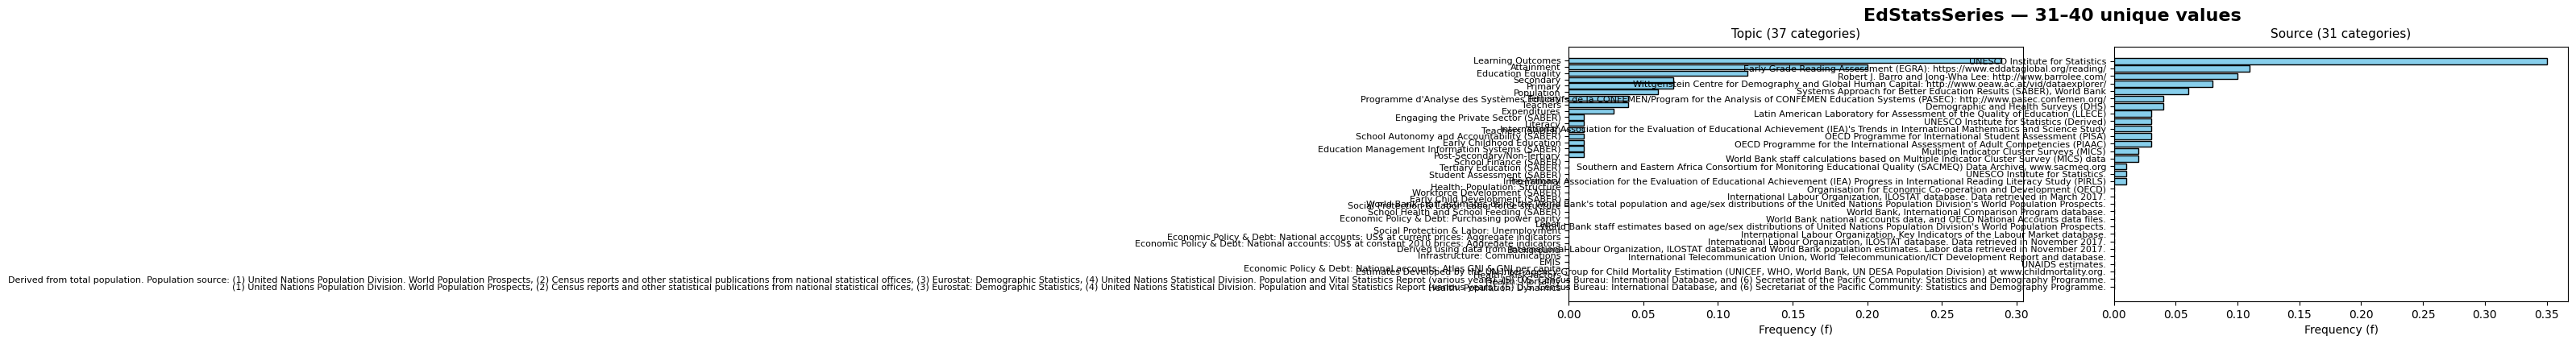

In [12]:
conf.pdconfig(nrows=None,cols_width=40)
data_inspector.prodata
data_inspector.dataTable()

## Key Findings: Categorical Variables

### EdStatsCountry - Classification Variables (2–10 unique values)

**Geographic and economic coverage:**  
Region and Income Group show balanced distribution across countries, indicating strong global representation.

**Standardization:**  
Most countries follow the 1993 System of National Accounts and Value Added at Basic Prices (VAB), demonstrating institutional consistency in reporting frameworks.

**Limited variation:**  
Government Accounting, IMF Data Standards, and Vital Registration show minimal diversity, suggesting few reporting outliers.

---

### EdStatsCountry - Temporal Data Quality

**Latest Water Withdrawal Data:**  
Concentrated in 2000–2007 period, reflecting a coordinated global collection effort. Pre-2000 data shows significant gaps, particularly for developing nations.

**Latest Agricultural Census:**  
Peak activity in 2008–2015 (concentrated around 2010), indicating synchronized international agricultural data collection.

---

### EdStatsCountry-Series - Indicator Focus

**Population indicators dominate:**  
SP.POP.TOTL (total population) and SP.POP.GROW (population growth) comprise over two-thirds of records.

**Economic indicators underrepresented:**  
Measures like NY.GDP.PCAP.PP.CD show lower frequency, revealing a demographic rather than economic emphasis in the dataset.

---